<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/12_knn_Bank_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Clasificación: kNN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Para empezar, vamos a crear un dataset sintético que podamos aplicar en nuestro primer problema de clasificación. Será un problema de clasificación binaria en el que, para ir entendiendo los conceptos, sólo utilizaremos dos predictores.

In [4]:
#Importo el CSV creado previamente

df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UADE/Diplomatura Ciencia de Datos/Material de Clases/MESES_201402_201404.csv', dtype={"numero_de_cliente": int, "foto_mes": int, "cliente_sucursal": "string"})


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Elimino la primer columna
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

# Separo Features y Target
X = df2.drop(['target' , 'target_bin'] , axis='columns')
y = df2.target_bin

#Transformo Variables Categoricas
X = pd.get_dummies(X, columns = ['tpaquete2', 'tpaquete4', 'tpaquete6', 'tpaquete7', 'tpaquete9', 'tcuentas', 'tcuenta_corriente', 'tcaja_ahorro', 'ttarjeta_debito', 'ttarjeta_visa', 'ttarjeta_master'])

#Descarto columnas no numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
X = X.select_dtypes(include=numerics)
#one_hot_encoding
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
X = X.fillna(0)

In [6]:
#Separo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)   # Atención: pasamos la "y"



# K-Nearest Neighbors

Para demostrar la sencillez de la API de scikit-learn, veamos este mismo ejemplo con otro clasificador, el clasificador K-Nearest Neighbors.

Este clasificador sigue una estrategia muy simple: dada una nueva observación, busca en los datos de entrenamiento las K observaciones más cercanas de manera que asigna la etiqueta mayoritaria de esos K-vecinos más cercanos.

Como veremos, la interfaz es exactamente igual que en el caso de la regresión logística.

In [7]:
from sklearn.neighbors import KNeighborsClassifier



Para construir el modelo, tenemos que especificar el valor del hiperparámetro K (en scikit se llama `n_neighbors`):

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)



Ahora realizamos el ajuste a los datos de entrenamiento:

In [9]:
#Entreno
clf = knn.fit(X_train, y_train)

In [10]:
#Score
clf.score(X_test, y_test)

0.9919113768243362

In [11]:
# Predict on training set and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [12]:
# Calculo Probabilidades Asociadas
y_test_proba = clf.predict_proba(X_test)[:,1]

In [13]:
# Accuracy 
from sklearn.metrics import accuracy_score
print('Accuracy train:',accuracy_score(y_train, y_train_pred))
print('Accuracy test:',accuracy_score(y_test, y_test_pred))

Accuracy train: 1.0
Accuracy test: 0.9919113768243362


In [14]:
# veo la matriz de confusión en train
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[135905,      0],
       [     0,    580]])

In [15]:
# veo la matriz de confusión en test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[45125,   178],
       [  190,     3]])

In [16]:
#Ahora puedo obtener Recall y Precision
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred))
print('Test:',accuracy_score(y_test, y_test_pred))
print(' ')
print('Recall')
print('Train:',recall_score(y_train, y_train_pred))
print('Test:',recall_score(y_test, y_test_pred))
print(' ')
print('Precision')
print('Train:',precision_score(y_train, y_train_pred))
print('Test:',precision_score(y_test, y_test_pred))

Accuracy
Train: 1.0
Test: 0.9919113768243362
 
Recall
Train: 1.0
Test: 0.015544041450777202
 
Precision
Train: 1.0
Test: 0.016574585635359115



************************How to plot a ROC Curve in Python*************************
roc_auc_score for DecisionTree:  0.8591574360732153
roc_auc_score for DecisionTree_5:  0.8154476610511673
roc_auc_score for Logistic Regression:  0.8534903554980804
roc_auc_score for KNN:  0.5160483029695616


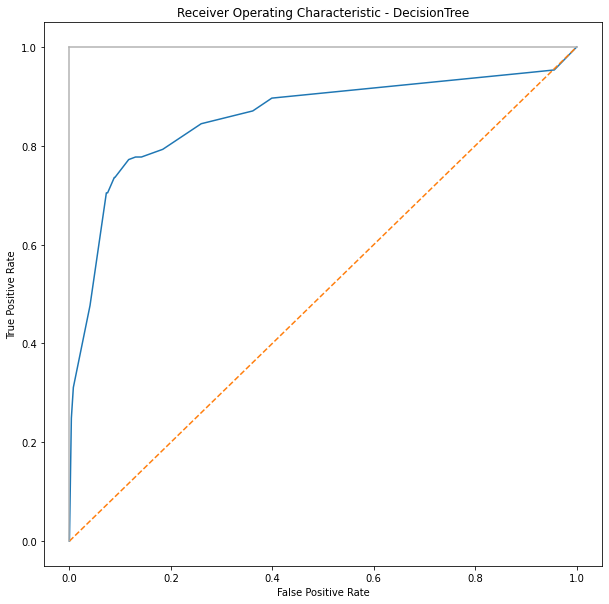

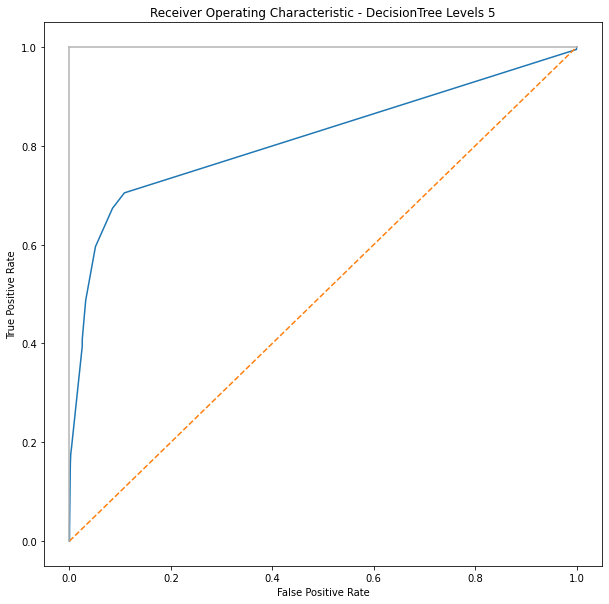

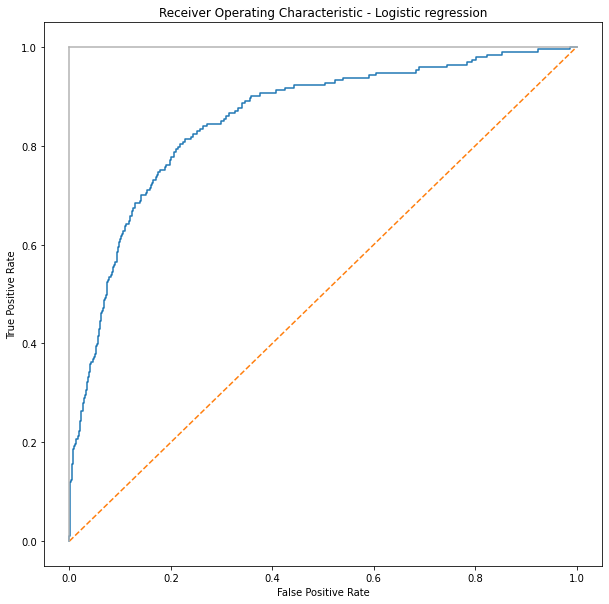

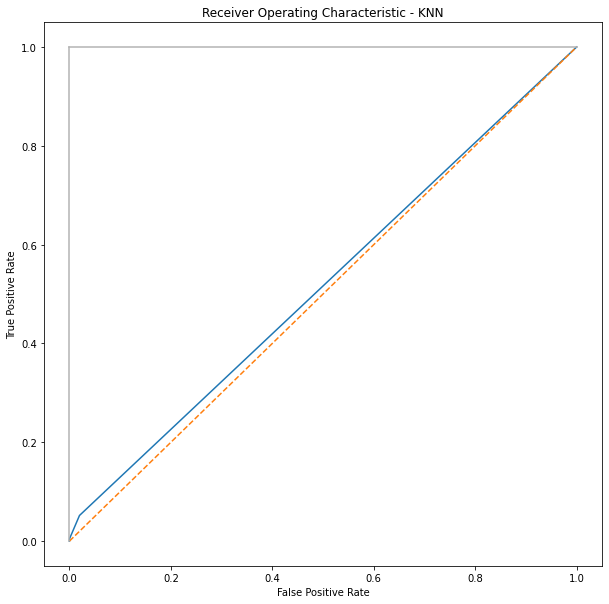

In [17]:
    print()
    print(format('How to plot a ROC Curve in Python','*^82'))

    import warnings
    warnings.filterwarnings("ignore")

    # load libraries
    from sklearn.datasets import make_classification
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Create feature matrix and target vector
    #X, y = make_classification(n_samples=10000, n_features=100, n_classes=2)

    # Split into training and test sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Create classifier
    clf1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
    clf2 = DecisionTreeClassifier(max_depth=5)
    clf3 = LogisticRegression()
    clf4 = KNeighborsClassifier() #Atención

    # Train model
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    clf4.fit(X_train, y_train)

    # Get predicted probabilities
    y_score1 = clf1.predict_proba(X_test)[:,1]
    y_score2 = clf2.predict_proba(X_test)[:,1]
    y_score3 = clf3.predict_proba(X_test)[:,1]
    y_score4 = clf4.predict_proba(X_test)[:,1]

    # Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
    false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
    false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
    print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
    print('roc_auc_score for DecisionTree_5: ', roc_auc_score(y_test, y_score2))
    print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score3))
    print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score4))

    # Plot ROC curves
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree Levels 5')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate3, true_positive_rate3)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - KNN')
    plt.plot(false_positive_rate4, true_positive_rate4)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [18]:
#Ganancia
#TP = 4900
#FP = -100


In [19]:
df_pred = pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred,"prob_a": y_test_proba} )
df_pred.head()

,y_test,y_test_pred,prob_a
138499,0,0,0.0
8773,0,0,0.0
30751,0,0,0.0
76163,0,0,0.0
82917,0,0,0.0


In [20]:
df_pred['profit'] = df_pred['y_test_pred']*(-100)+df_pred['y_test_pred']*df_pred['y_test']*5000
df_pred.head()

,y_test,y_test_pred,prob_a,profit
138499,0,0,0.0,0
8773,0,0,0.0,0
30751,0,0,0.0,0
76163,0,0,0.0,0
82917,0,0,0.0,0


In [21]:
print('Max:', df_pred.profit.max())
print('Min:', df_pred.profit.min())
print('Total:', df_pred.profit.sum())

Max: 4900
Min: -100
Total: -3100


In [22]:
df_rank = df_pred.sort_values(by=['prob_a'], ascending=False)
df_rank.head()

,y_test,y_test_pred,prob_a,profit
49593,0,1,1.0,-100
109628,0,1,1.0,-100
94730,0,1,1.0,-100
53235,0,1,1.0,-100
103711,0,1,1.0,-100


In [23]:
df_rank.profit.cumsum().max()

3000



# Ejercicios



## Ejercicio 1
Aumenta el número de vecinos del KNN (p.ej hasta 30) y describe como se comporta el algoritmo



n = 5

In [24]:
# Respuesta aqui



n = 15

In [25]:
# Respuesta aqui



n = 30

In [26]:
# Respuesta aqui



## Ejercicio 2

Utiliza KNN en el dataset de `iris`. Prueba a asignar diferentes valores de K para observar como cambia el score.


In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

# Para buscar qué valor de K es mejor, no nos vale hacerlo con un split de train + test,
# tenemos que utilizar un subset del conjunto de train llamado validación 
X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)



Validad aquí los scores de cada K.
Mostrad el score del modelo "ganador" en el conjunto de test.

In [28]:
# Respuesta aqui